In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\user\Downloads\Amazon Sale Report.csv")

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

,index,Qty,Amount,ship-postal-code
count,128976.000000,128976.000000,121176.000000,128941.000000
mean,64486.130427,0.904401,648.562176,463945.677744
std,37232.897832,0.313368,281.185041,191458.488954
min,0.000000,0.000000,0.000000,110001.000000
25%,32242.750000,1.000000,449.000000,382421.000000
50%,64486.500000,1.000000,605.000000,500033.000000
75%,96730.250000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [ ]:
df['Amount'].fillna(0, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')
df['Amount'] = df['Amount'].astype(float)
df_sales = df[df['Status'].isin(['Shipped', 'Shipped - Delivered to Customer'])]
df_sales = df_sales.drop_duplicates(subset=['Order ID'])

print(df_sales.info())
print(df_sales.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 72742 entries, 2 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               72742 non-null  int64         
 1   Order ID            72742 non-null  object        
 2   Date                40105 non-null  datetime64[ns]
 3   Status              72742 non-null  object        
 4   Fulfilment          72742 non-null  object        
 5   Sales Channel       72742 non-null  object        
 6   ship-service-level  72742 non-null  object        
 7   Category            72742 non-null  object        
 8   Size                72742 non-null  object        
 9   Courier Status      72742 non-null  object        
 10  Qty                 72742 non-null  int64         
 11  currency            72581 non-null  object        
 12  Amount              72742 non-null  float64       
 13  ship-city           72730 non-null  object        

C:\Users\user\AppData\Local\Temp\ipykernel_12768\1054840567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(0, inplace=True)


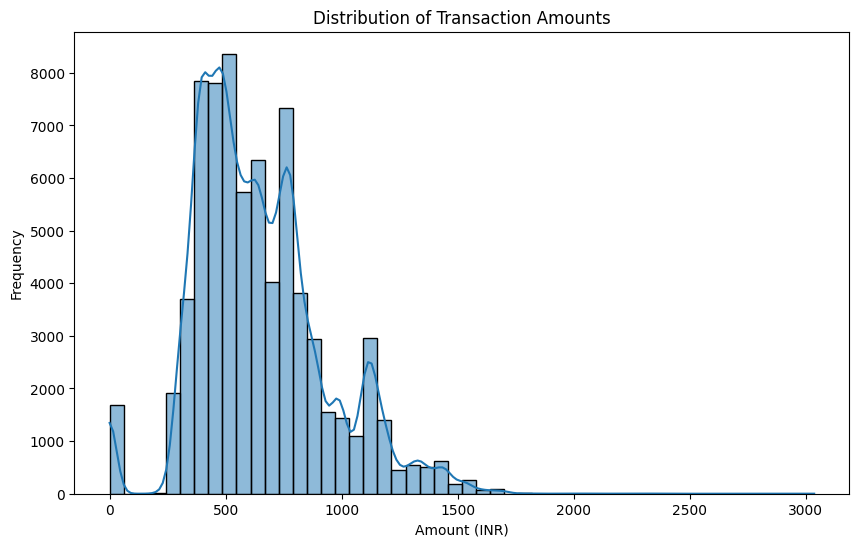

count    72742.000000
mean       648.015947
std        283.759028
min          0.000000
25%        442.000000
50%        599.000000
75%        788.000000
max       3036.000000
Name: Amount, dtype: float64


In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df_sales['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.show()

print(df_sales['Amount'].describe())

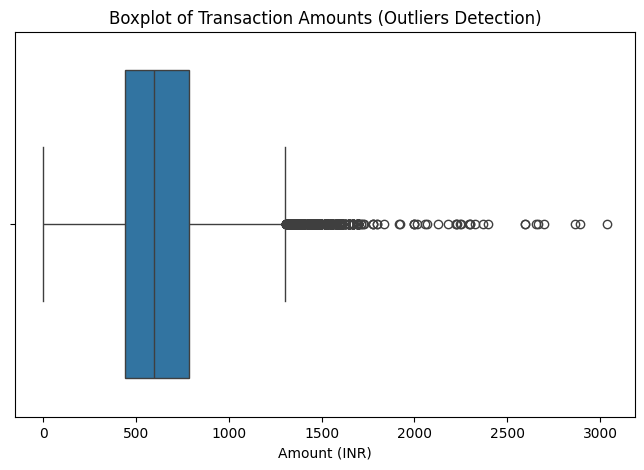

Number of outliers: 2005
                Order ID Category  Amount
244  408-2759943-9849959  T-shirt  1338.0
266  171-6655820-6440356  T-shirt  2130.0
300  404-7491342-1035558  T-shirt  1463.0
350  171-3537751-4007556  T-shirt  1999.0
417  404-0532727-2082745  T-shirt  1499.0


In [8]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_sales['Amount'])
plt.title('Boxplot of Transaction Amounts (Outliers Detection)')
plt.xlabel('Amount (INR)')
plt.show()


Q1 = df_sales['Amount'].quantile(0.25)
Q3 = df_sales['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_sales[(df_sales['Amount'] < (Q1 - 1.5 * IQR)) | (df_sales['Amount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")
print(outliers[['Order ID', 'Category', 'Amount']].head())

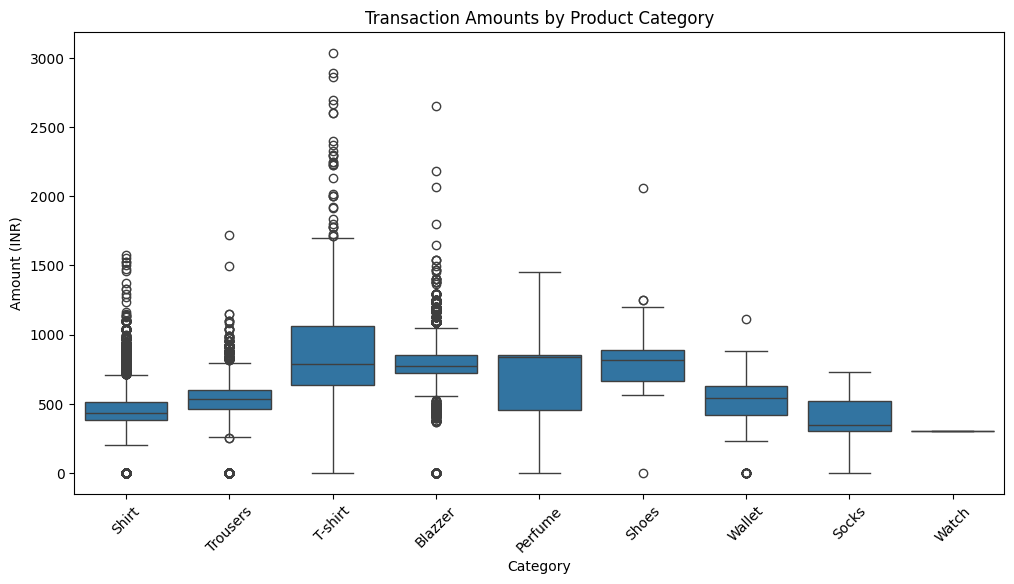

In [9]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=df_sales)
plt.title('Transaction Amounts by Product Category')
plt.xlabel('Category')
plt.ylabel('Amount (INR)')
plt.xticks(rotation=45)
plt.show()

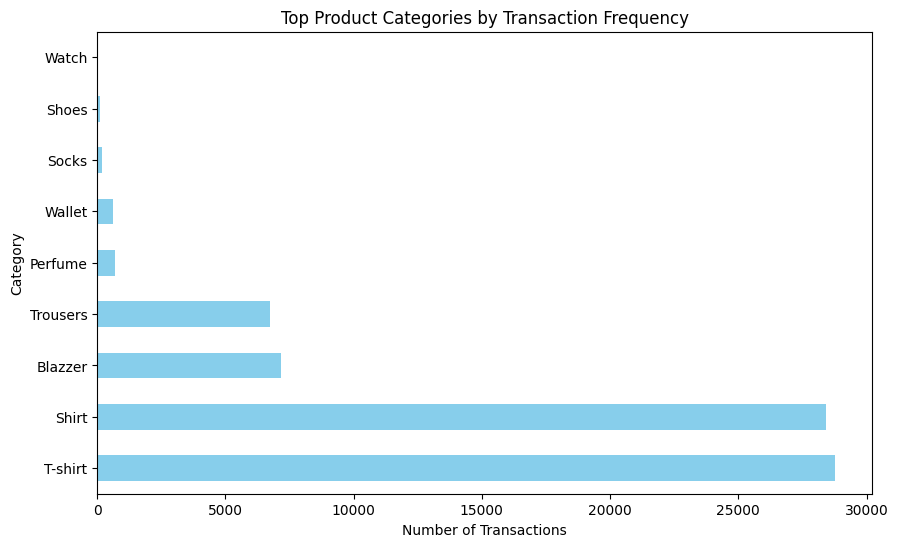

Category
T-shirt     28780
Shirt       28437
Blazzer      7162
Trousers     6743
Perfume       709
Wallet        600
Socks         206
Shoes         104
Watch           1
Name: count, dtype: int64


In [10]:

category_counts = df_sales['Category'].value_counts()


plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='skyblue')
plt.title('Top Product Categories by Transaction Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()

print(category_counts.head(10))

Category
T-shirt     23989085.0
Shirt       13003730.0
Blazzer      5571528.0
Trousers     3589575.0
Perfume       512241.0
Wallet        312464.0
Shoes          83296.0
Socks          75752.0
Watch            305.0
Name: Amount, dtype: float64


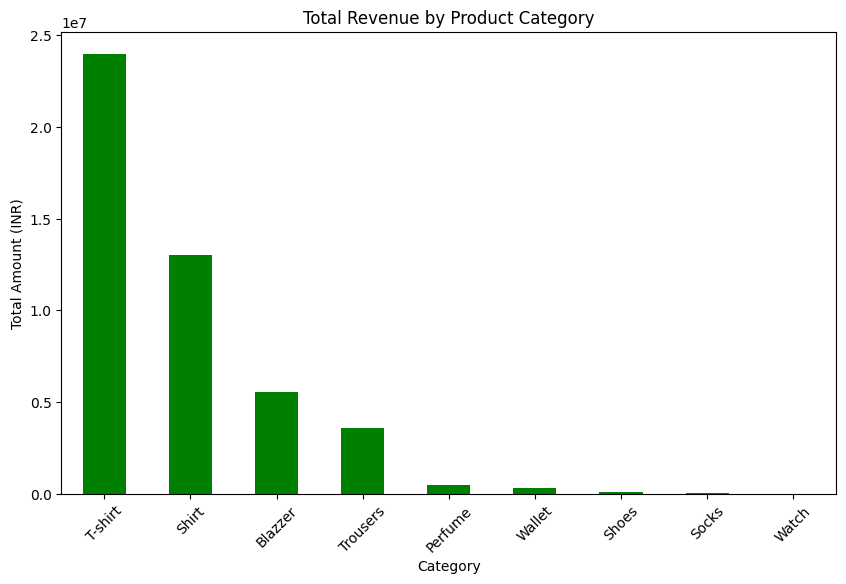

In [11]:
revenue_by_category = df_sales.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(revenue_by_category)

plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color='green')
plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.show()

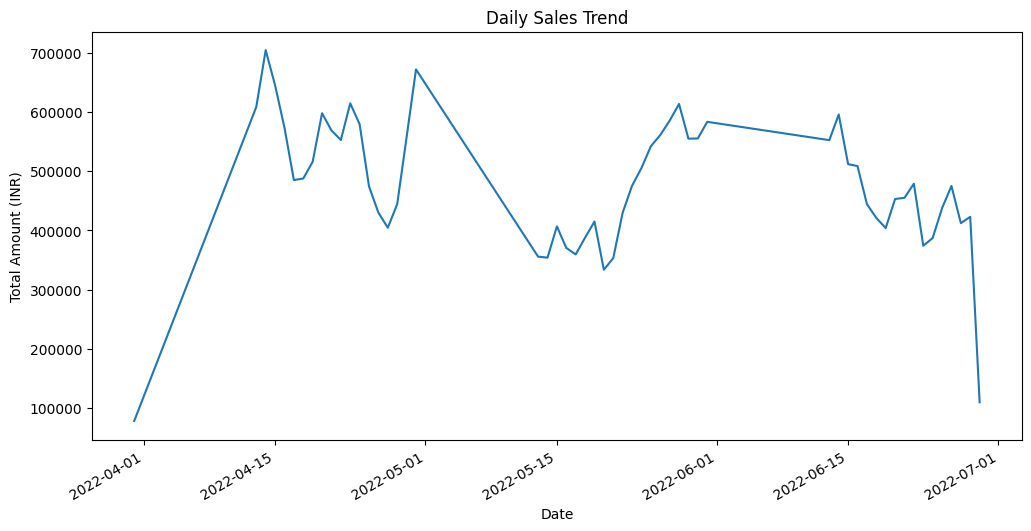

In [12]:
daily_sales = df_sales.groupby('Date')['Amount'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount (INR)')
plt.show()

B2B
False    46797205.0
True       340771.0
Name: Amount, dtype: float64


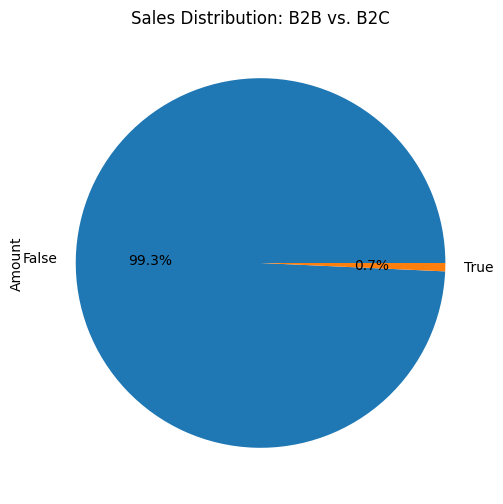

In [13]:
b2b_sales = df_sales.groupby('B2B')['Amount'].sum()
print(b2b_sales)

plt.figure(figsize=(6, 6))
b2b_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution: B2B vs. B2C')
plt.show()

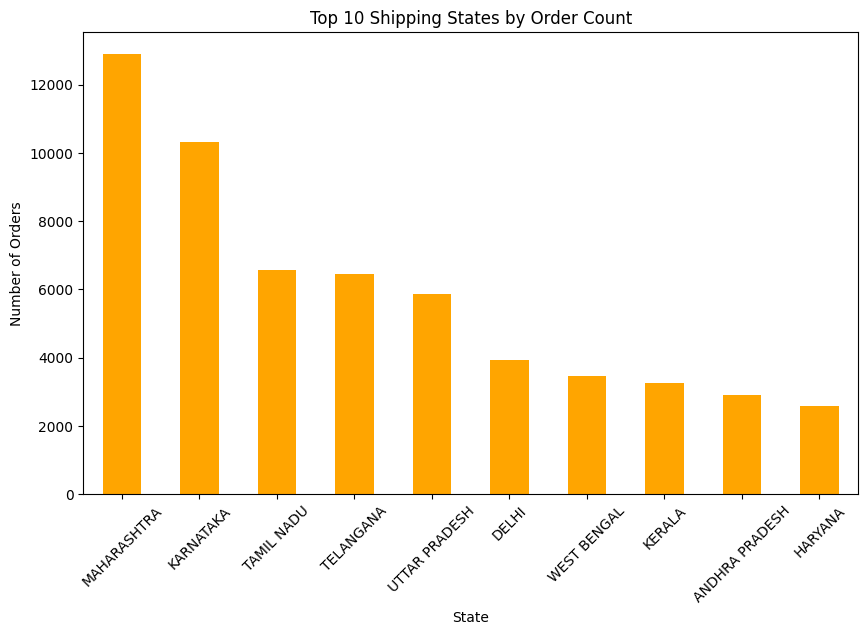

In [14]:
top_states = df_sales['ship-state'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='orange')
plt.title('Top 10 Shipping States by Order Count')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()